In [1]:
# read data
open('train.csv')
open('test.csv')

<_io.TextIOWrapper name='test.csv' mode='r' encoding='UTF-8'>

In [2]:
conda install mlxtend --channel conda-forge

Solving environment: done

## Package Plan ##

  environment location: //anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         148 KB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2019.11.27-0 --> conda-forge::ca-certificates-2019.11.28-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge
  openssl                anaconda::openssl-1.1.1-h1de35cc_0 --> conda-forge::openssl-1.1.1d-h0b31af3_0



certifi-2019.11.28   | 148 KB    | ##################################### | 100% 
Preparing transaction: done
V

In [3]:
conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: //anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         156 KB  anaconda
    conda-4.8.0                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                    conda-forge::conda-4.7.12-py37_1 --> pkgs/main::conda-4.8.0-py37_0
  openssl            conda-forge::openssl-1.1.1d-h0b31af3_0 --> anaconda::openssl-1.1.1-h1de35cc_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.11.~ --> anaconda::ca-certificates-2019.11.27-0
  certifi                                     

In [4]:
conda install -c anaconda py-lightgbm

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - py-lightgbm

Current channels:

  - https://conda.anaconda.org/anaconda/osx-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [5]:
#load packages
import numpy as np 
import pandas as pd 
from datetime import datetime
from scipy.stats import skew  
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
#print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

In [6]:
#load data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [7]:
#check basic information
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


# EDA

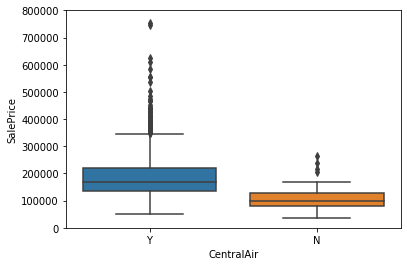

In [10]:
#I select several independent variables which may relate to the target varaible and visualize them with differnet methods.
# CentralAir
var = 'CentralAir'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

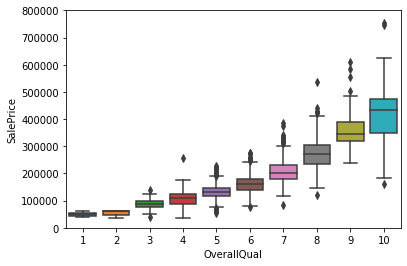

In [11]:
# OverallQual
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

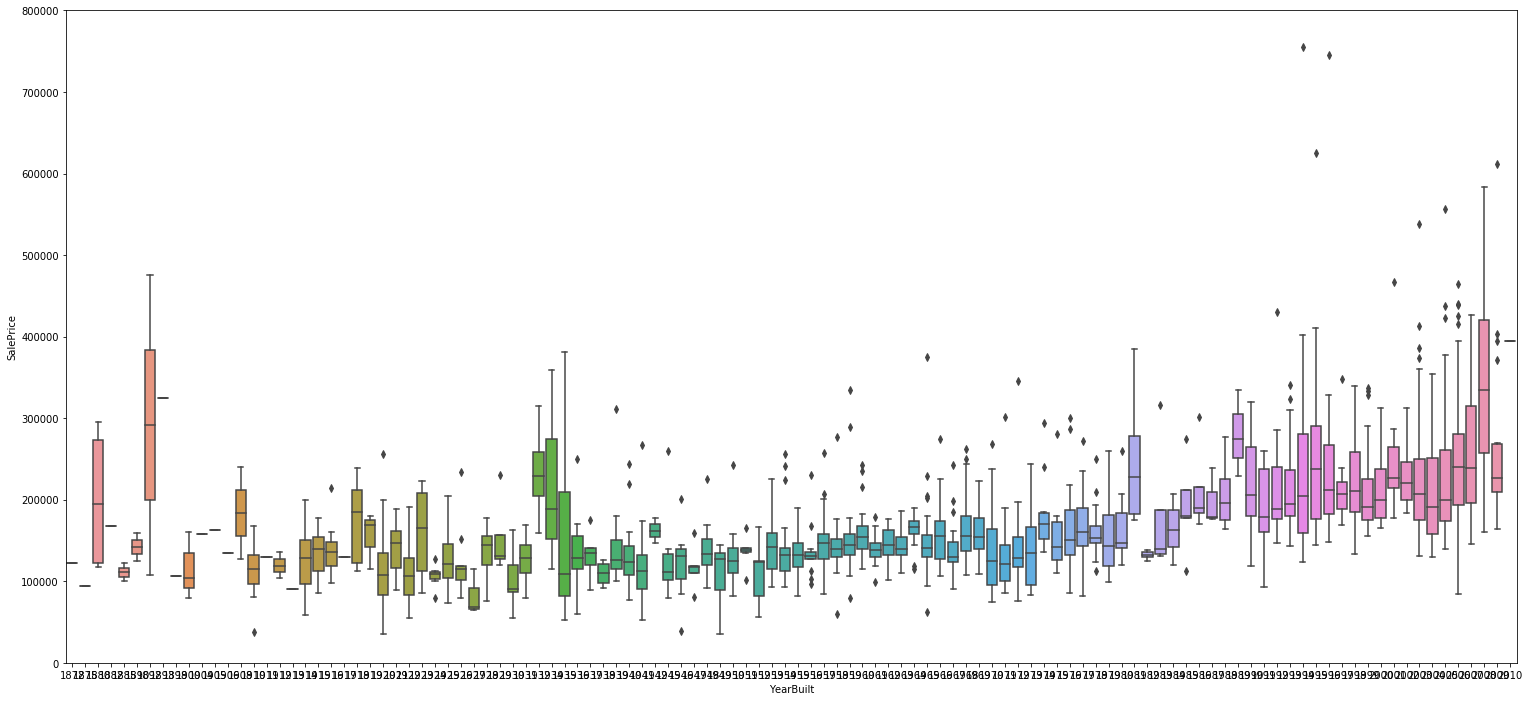

In [12]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

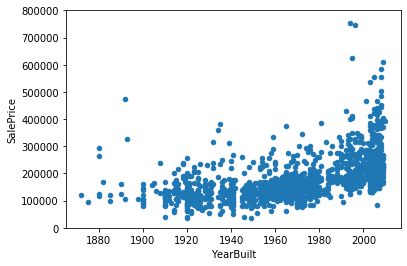

In [13]:
# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

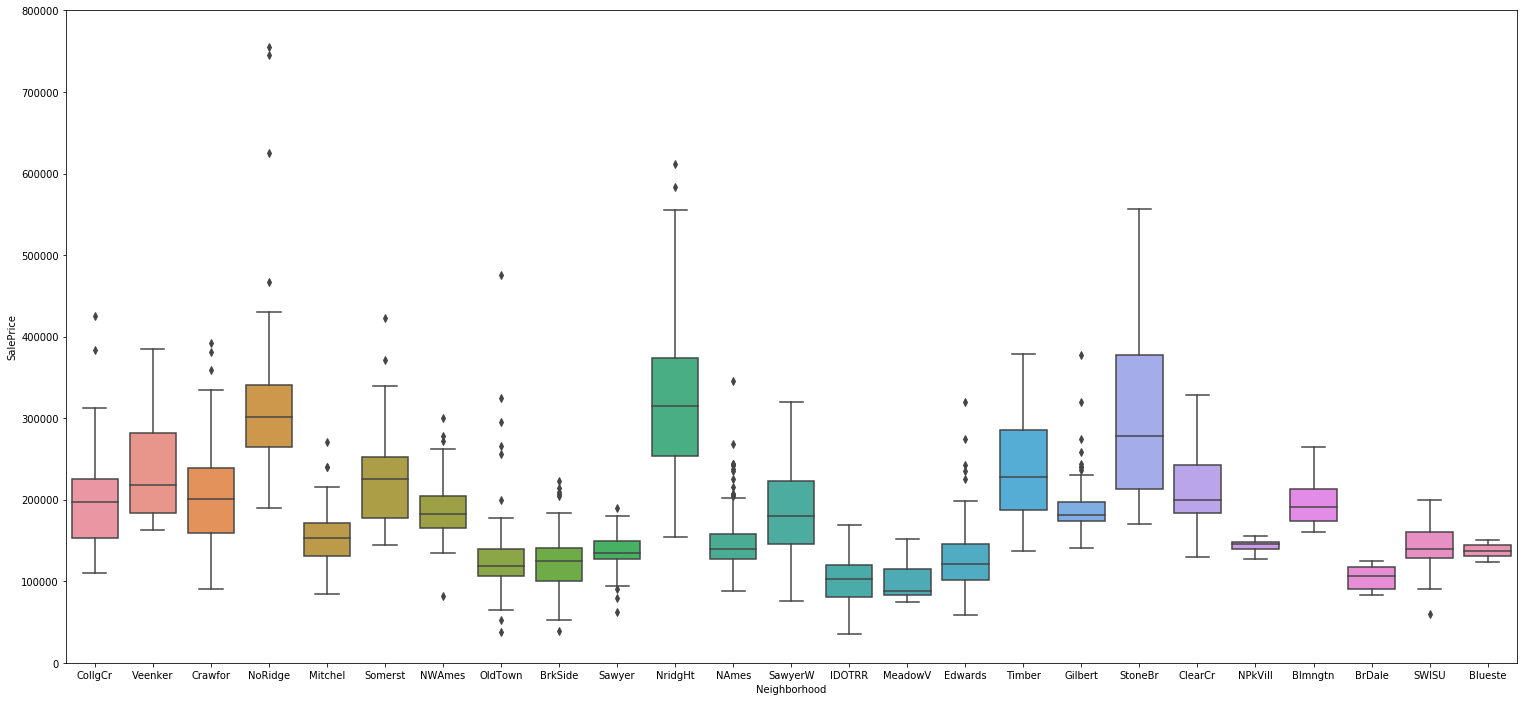

In [14]:
# Neighborhood
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

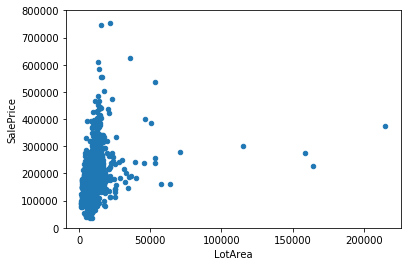

In [15]:
#LotArea
var  = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

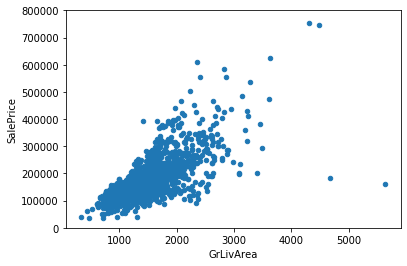

In [16]:
#GrLivArea
var  = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

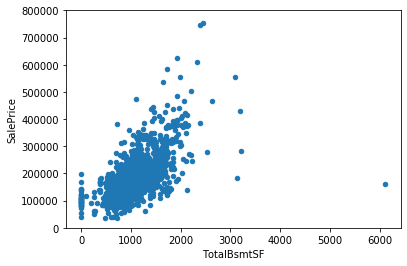

In [17]:
#TotalBsmtSF
var  = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

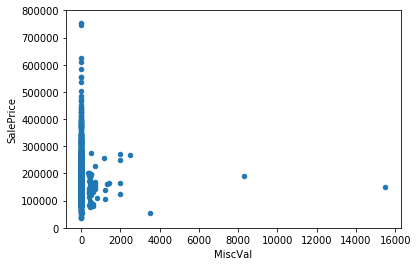

In [18]:
#MiscVal
var  = 'MiscVal'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

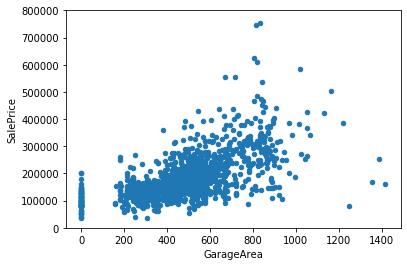

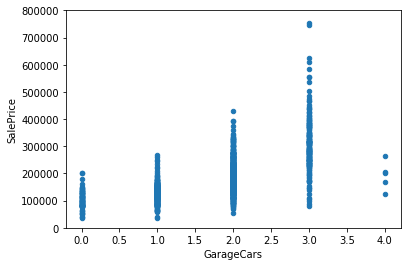

In [19]:
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    data = pd.concat([train['SalePrice'], train[var[index]]], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

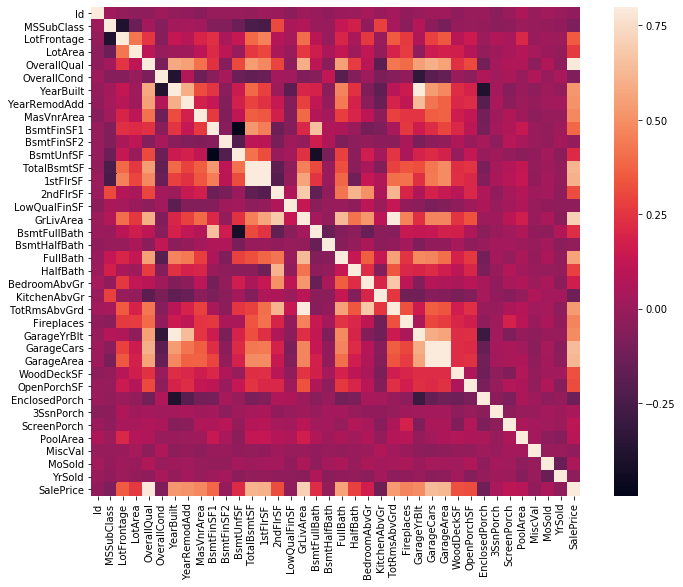

In [20]:
#correlation matrix　
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

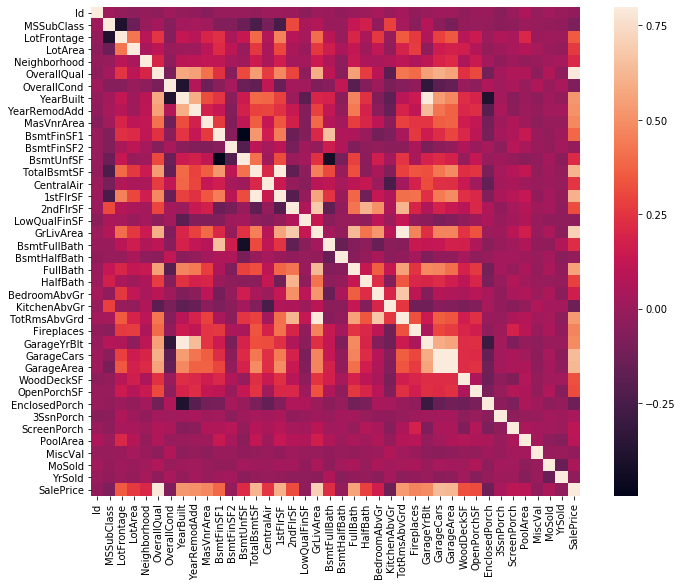

In [21]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

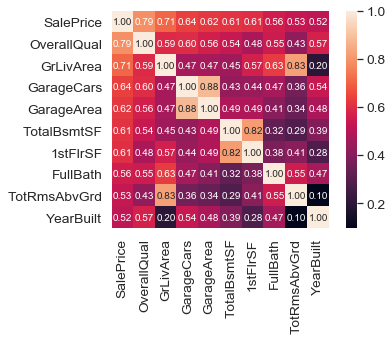

In [22]:
k = 10 #number of variables for heatmap
import numpy as np
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

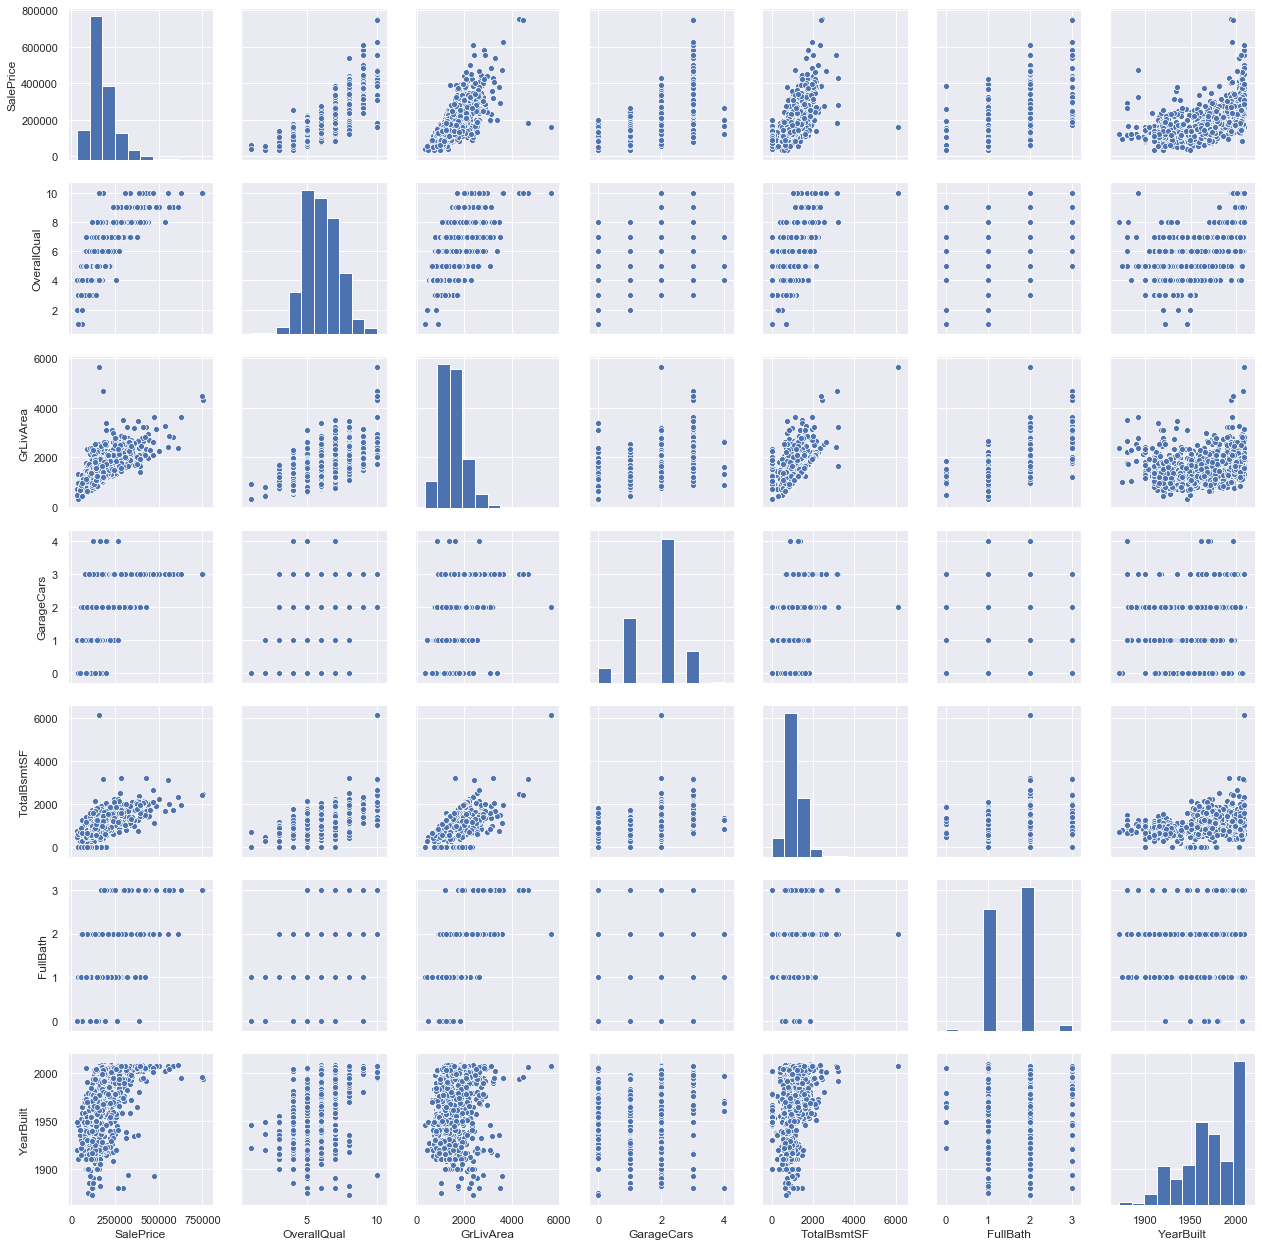

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

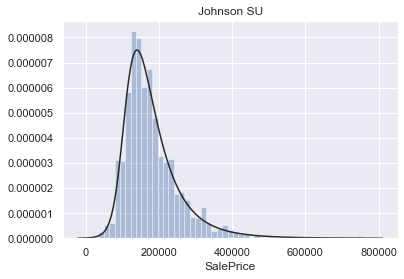

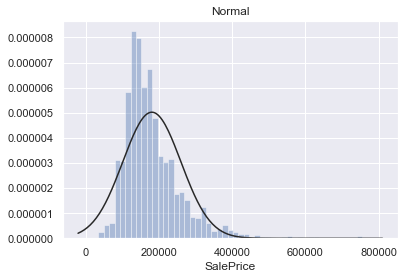

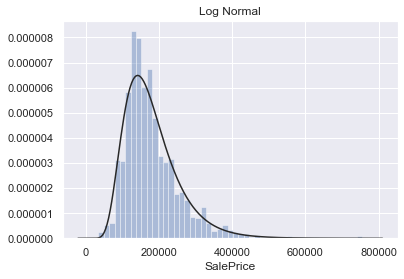

In [25]:
#Target varibale-SalePrice is a variable realted to money, which usaully trasformed by log function.
#Differnet independent varibales are measured in different units, data transformation is essential.
#three differnet distribution in SalePrice
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [26]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
#There are 80 independent varibales including quantitative and qualitative varibales. 
#To better clean data, I split the data into quantitative and qualitative varibales based on their types.
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [28]:
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [29]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
#test numeric varibles normality
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

Also none of quantitative variables has normal distribution so these should be transformed as well.

So we need another method to probe into the realtionship between the varibles. Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. OverallQual is main criterion in establishing house price. Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same characteristics (confunding) what causes similar valuations.

In [30]:
#check missing value
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Feature Engineering

Data Processing

In [31]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [32]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)#delete outliers based on scatterplot
train.reset_index(drop=True, inplace=True)
train["SalePrice"] = np.log1p(train["SalePrice"])#log1p menas log(n+1)
y = train['SalePrice'].reset_index(drop=True)

In [35]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Features

In [36]:
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [37]:
features.shape

(2917, 79)

In [38]:
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :features_na})
missing_data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Imputing missing values

In [39]:
#some missing value has a lot of missing value, using None instead of Na
features["PoolQC"] = features["PoolQC"].fillna("None")
features["MiscFeature"] = features["MiscFeature"].fillna("None")
features["Alley"] = features["Alley"].fillna("None")
features["Fence"] = features["Fence"].fillna("None")
features["FireplaceQu"] = features["FireplaceQu"].fillna("None")

In [40]:
#Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
features["LotFrontage"] = features.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [41]:
#replace missing value with None for qualiative varaibles 
#garage-related variabls
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    features[col] = features[col].fillna('None')
#basement-related variables
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')
#masonry venee
features["MasVnrType"] = features["MasVnrType"].fillna("None")
#buliding class
features['MSSubClass'] = features['MSSubClass'].fillna("None")

In [42]:
#replace missing value with 0 for quantative varaibles 
#garage-related variables
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
#basement-related variables
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    features[col] = features[col].fillna(0)
#masonry venee
features["MasVnrArea"] = features["MasVnrArea"].fillna(0)

In [43]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

In [44]:
#utilities: nearly all records are "AllPub"(expect one "NoSeWa" in train data and 2 NA)
#utilities will not help predictive modelling
features = features.drop(['Utilities'], axis=1)

In [45]:
#Functional : data description says NA means typical
features["Functional"] = features["Functional"].fillna("Typ")

In [46]:
# few NA (smaller than five) values, using mode instead of missing value
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

In [47]:
#checking missing value again
features_na = (features.isnull().sum() / len(features)) * 100
features_na = features_na.drop(features_na[features_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :features_na})
missing_data

,Missing Ratio


Dealing With Categorical Features

In [48]:
#change numerical variables that are really categorical
#MSSubClass=The building class
features['MSSubClass'] = features['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
features['OverallCond'] = features['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

In [49]:
#label encoding some meaningful categorical variables
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(features[c].values)) 
    features[c] = lbl.transform(list(features[c].values))
#shape        
print('Shape features: {}'.format(features.shape))

Shape features: (2917, 78)


Feature Generation

In [50]:
#house 
features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
#total house area
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
#total footage area
features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])
#total bathroom area
features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
#total porch area
features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [51]:
#simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [52]:
features.shape

(2917, 88)

Skewd features

In [53]:
numeric_feats = features.dtypes[features.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = features[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
haspool,15.494756
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344


In [54]:
#Box Cox Transformation of (highly) skewed features
#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
#setting  λ=0 is equivalent to log1p used above for the target variable.
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    features[feat] = boxcox1p(features[feat], lam)

There are 68 skewed numerical features to Box Cox transform


Getting dummy categorical features

In [55]:
final_features = pd.get_dummies(features)
print(final_features.shape)

(2917, 254)



 mu = 12.02 and sigma = 0.40



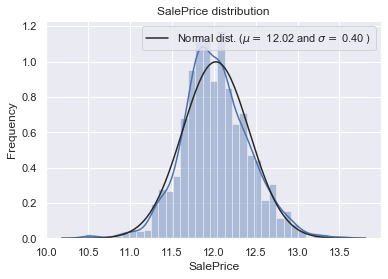

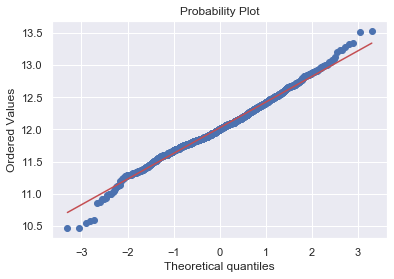

In [56]:
#check target value distribution
from scipy.stats import norm
sns.distplot(train['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Feature selection

In [57]:
#X is data we will use to train and y is the accoridng SalePrice
#X_sub is data we need to make prediction
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1458, 254), (1458,), (1459, 254))

In [58]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Feature Importance (Random Forest)

In [74]:
# use random feorest to check feature importance
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=99)
forest.fit(X, y) 
print(forest.score(X,y))
importance = forest.feature_importances_
imp_forest= pd.DataFrame(importances,
                                   index = X.columns.values,
                                    columns=['importance']).sort_values('importance', ascending=False)
imp_forest.head(20)

0.9768923012966904


,importance
OverallQual,0.496678
TotalSF,0.206885
Total_sqr_footage,0.098705
CentralAir,0.021268
YrBltAndRemod,0.013414
GrLivArea,0.011255
LotArea,0.010885
GarageArea,0.009501
GarageCars,0.008867
YearRemodAdd,0.008587


Text(0.5, 1.0, 'Feature imporantce in Random Forest')

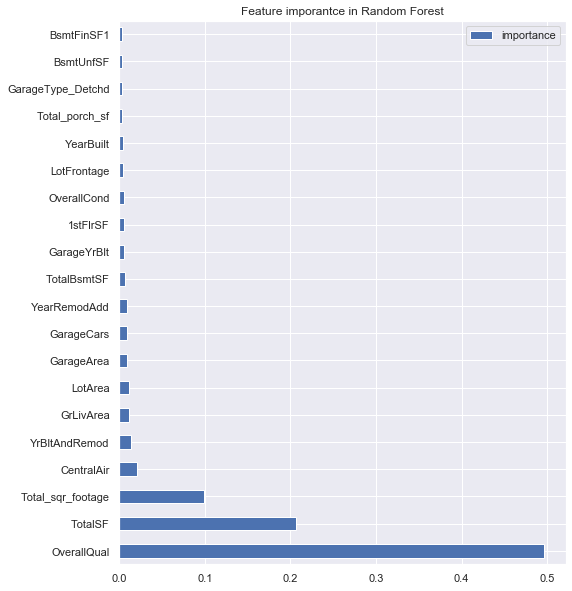

In [99]:
# plot the feature importance in random forest
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_forest.head(20).plot(kind = "barh")
plt.title("Feature imporantce in Random Forest")

# Modelling

In [75]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

Define a cross validation strategy

In [76]:
#Validation function
n_folds = 10
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Base Models And Their Feature Importance

In [77]:
#lasso
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(X,y)
coef_lasso = pd.Series(lasso.coef_, index = X.columns)
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1111 (0.0141)



Text(0.5, 1.0, 'Coefficients in the Lasso Model')

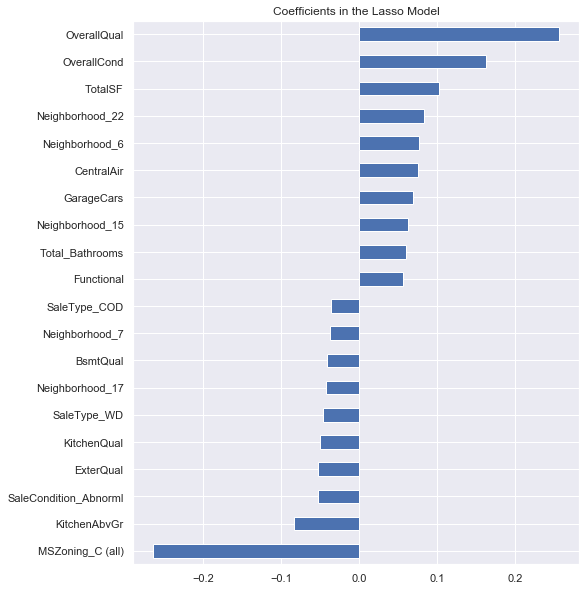

In [78]:
#lasso feature impoartnce
imp_coef_lasso = pd.concat([coef_lasso.sort_values().head(10), coef_lasso.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_lasso.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [79]:
#ridge
ridge = Ridge(alpha =0.0005, random_state=1)
ridge.fit(X, y)
coef_ridge = pd.Series(ridge.coef_, index = X.columns)
score = rmsle_cv(ridge)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.1204 (0.0166)



Text(0.5, 1.0, 'Coefficients in the Ridge Model')

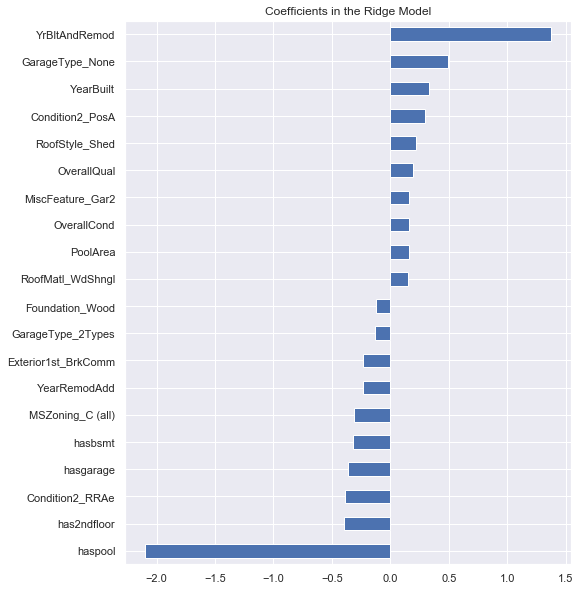

In [80]:
#ridge feature impoartnce
imp_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_ridge.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [81]:
#elasticnet
elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9)
elastic.fit(X,y)
coef_ENet = pd.Series(elastic.coef_, index = X.columns)
score = rmsle_cv(elastic)
print("\nRidge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge score: 0.1110 (0.0142)



Text(0.5, 1.0, 'Coefficients in the ENet Model')

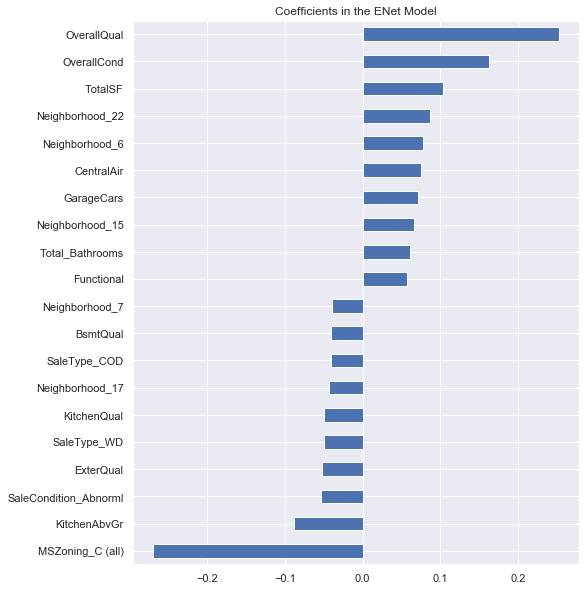

In [82]:
#ElasticNet feature impoartnce
imp_coef_ENet = pd.concat([coef_ENet.sort_values().head(10), coef_ENet.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_ENet.plot(kind = "barh")
plt.title("Coefficients in the ENet Model")

In [83]:
#GBoost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X,y)
imp_GBoost = pd.DataFrame(GBoost.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp_GBoost= imp_GBoost.sort_values(['Importance'], ascending = False)
score = rmsle_cv(GBoost)
print("GBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

GBoost score: 0.1120 (0.0176)



Text(0.5, 1.0, 'Feature imporantce in the GBoost Model')

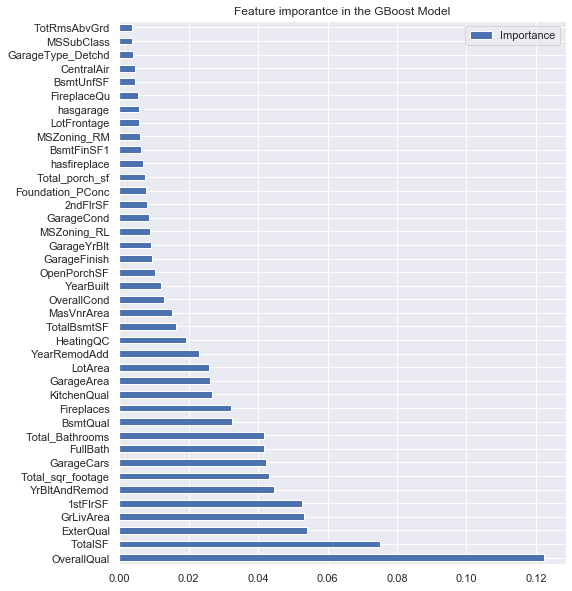

In [84]:
#GBoost feature impoartnce
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_GBoost.head(40).plot(kind = "barh")
plt.title("Feature imporantce in the GBoost Model")

In [85]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
xgboost.fit(X,y)
imp_xgb = pd.DataFrame(xgboost.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp_xgb= imp_xgb.sort_values(['Importance'], ascending = False)
score = rmsle_cv(xgboost)
print("GBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[19:25:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

Text(0.5, 1.0, 'Feature Imporantce in the XBoost Model')

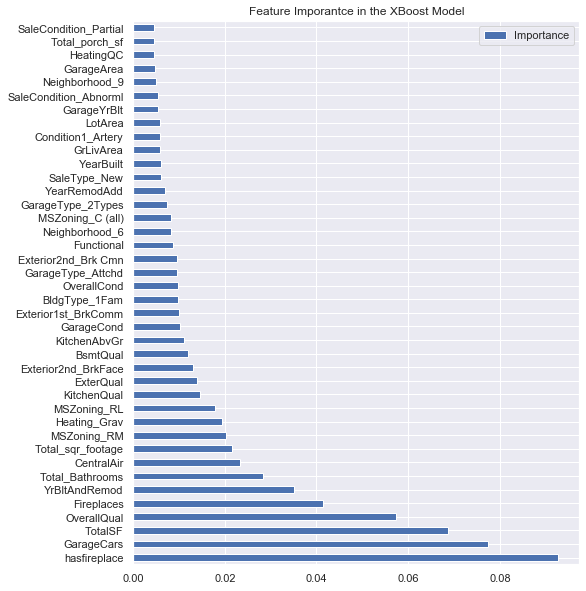

In [86]:
#XGboost feature impoartnce
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_xgb.head(40).plot(kind = "barh")
plt.title("Feature Imporantce in the XBoost Model")